# Working with USDA data

Dataset is located in https://courses.edx.org/c4x/MITx/15.071x_2/asset/USDA.csv

In [19]:
import pandas as pd

In [20]:
url = 'https://courses.edx.org/c4x/MITx/15.071x_2/asset/USDA.csv'
df = pd.read_csv(url)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 16 columns):
ID              7058 non-null int64
Description     7058 non-null object
Calories        7057 non-null float64
Protein         7057 non-null float64
TotalFat        7057 non-null float64
Carbohydrate    7057 non-null float64
Sodium          6974 non-null float64
SaturatedFat    6757 non-null float64
Cholesterol     6770 non-null float64
Sugar           5148 non-null float64
Calcium         6922 non-null float64
Iron            6935 non-null float64
Potassium       6649 non-null float64
VitaminC        6726 non-null float64
VitaminE        4338 non-null float64
VitaminD        4224 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 882.3+ KB


In [22]:
df.describe()

,ID,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
count,7058.000000,7057.000000,7057.000000,7057.000000,7057.000000,6974.000000,6757.000000,6770.000000,5148.000000,6922.000000,6935.000000,6649.000000,6726.000000,4338.000000,4224.000000
mean,14259.821196,219.695338,11.710368,10.320614,20.697860,322.059220,3.452267,41.551994,8.256540,73.530627,2.828368,301.357949,9.435980,1.487462,0.576918
std,8577.179705,172.198755,10.919356,16.814191,27.630443,1045.416931,6.921267,122.963028,15.361509,222.445338,6.019878,415.638949,71.256536,5.386914,4.301147
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8387.250000,85.000000,2.290000,0.720000,0.000000,37.000000,0.172000,0.000000,0.000000,9.000000,0.520000,135.000000,0.000000,0.120000,0.000000
50%,13293.500000,181.000000,8.200000,4.370000,7.130000,79.000000,1.256000,3.000000,1.395000,19.000000,1.330000,250.000000,0.000000,0.270000,0.000000
75%,18336.750000,331.000000,20.430000,12.700000,28.170000,386.000000,4.028000,69.000000,7.875000,56.000000,2.620000,348.000000,3.100000,0.710000,0.100000
max,93600.000000,902.000000,88.320000,100.000000,100.000000,38758.000000,95.600000,3100.000000,99.800000,7364.000000,123.600000,16500.000000,2400.000000,149.400000,250.000000


In [23]:
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


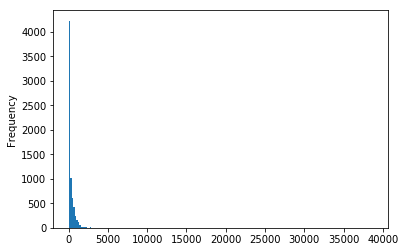

In [24]:
# The maximum amount of sodium per day is 2,300 (OMS)
df.Sodium.plot.hist(bins=200)

In [25]:
max_id = df.Sodium.idxmax()
df.iloc[max_id]['Description']

'SALT,TABLE'

In [26]:
# Check out what sources of sodium have more than 10000 mg
df[df.Sodium >= 10000][['Description', 'Sodium']]

,Description,Sodium
264,"SALT,TABLE",38758.0
921,"SOUP,BF BROTH OR BOUILLON,PDR,DRY",26000.0
922,"SOUP,BEEF BROTH,CUBED,DRY",24000.0
924,"SOUP,CHICK BROTH OR BOUILLON,DRY",23875.0
925,"SOUP,CHICK BROTH CUBES,DRY",24000.0
937,"GRAVY,AU JUS,DRY",11588.0
1302,ADOBO FRESCO,17152.0
5320,"LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,NA A...",10600.0
5323,"LEAVENING AGENTS,BAKING SODA",27360.0
5697,"DESSERTS,RENNIN,TABLETS,UNSWTND",26050.0


In [27]:
# We know caviar has a lot of salt lets check out
df[df.Description.str.contains('CAVIAR')]

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
4153,15012,CAVIAR,264.0,24.6,17.9,4.0,1500.0,4.06,588.0,0.0,275.0,11.88,181.0,0.0,1.89,2.9


In [28]:
# Check the amount of sodium in caviar
df[df.Description.str.contains('CAVIAR')].Sodium

4153    1500.0
Name: Sodium, dtype: float64

In [29]:
# Describe Sodium Colum
df.Sodium.describe()

count     6974.000000
mean       322.059220
std       1045.416931
min          0.000000
25%         37.000000
50%         79.000000
75%        386.000000
max      38758.000000
Name: Sodium, dtype: float64

# Data Visualization

Text(0.5, 1.0, 'Protein vs Fat')

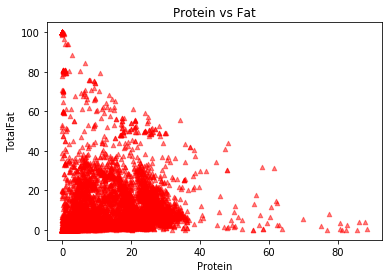

In [30]:
# Plot scatter total protein

ax = df.plot.scatter('Protein', 'TotalFat', color='r', marker='^', alpha=0.5)
ax.set_title('Protein vs Fat')

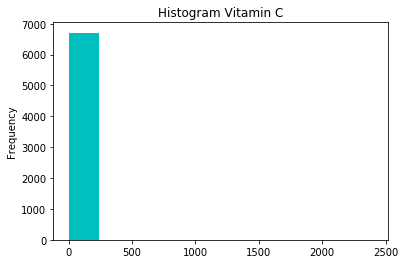

In [31]:
# Plot histogram of vitamin C
df.VitaminC.plot.hist(color = 'c', title='Histogram Vitamin C')

### *More than 6000 foods have less than 1 mg of vitamin C*

### *Just one cell group is shown*

(0, 100)

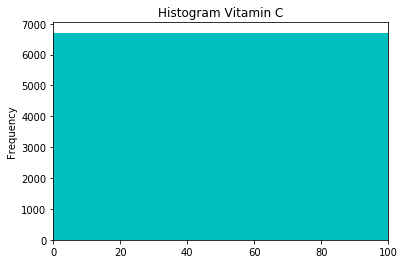

In [32]:
ax = df.VitaminC.plot.hist(color = 'c', title='Histogram Vitamin C')
ax.set_xlim(0, 100)

### Just one giant cell is shown

(0, 100)

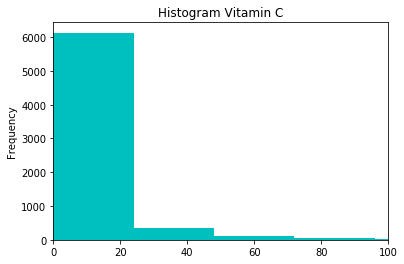

In [33]:
# Use bins to divide the cells into 100 cells
ax = df.VitaminC.plot.hist(color = 'c', title='Histogram Vitamin C', bins = 100)
ax.set_xlim(0, 100)

### We still want to divide the cells into 100

(0, 100)

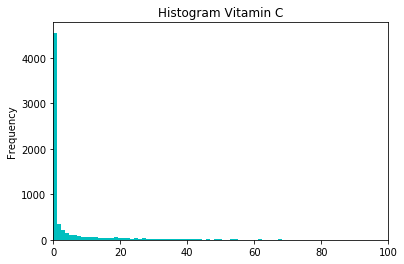

In [34]:
# Think about the original dataset length (0, 2000)
ax = df.VitaminC.plot.hist(color = 'c', title='Histogram Vitamin C', bins = 2000)
ax.set_xlim(0, 100)

# Boxplots

Text(0, 0.5, 'Sugar (g)')

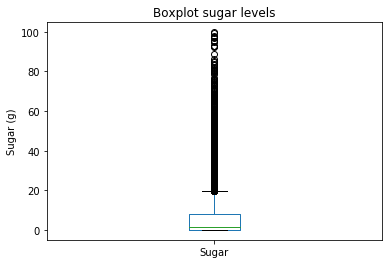

In [35]:
ax = df.Sugar.plot.box(title='Boxplot sugar levels')
ax.set_ylabel('Sugar (g)')

### Lets suppose we want to evaluate the foods with sodium concentration above mean

To do so we going to create a new column called high sodium and set value 0 if it not higher than mean and 1 if it is.

In [36]:
df.loc[df.Sodium > df.Sodium.mean(), 'HighSodium'] = 1
df.loc[df.Sodium <= df.Sodium.mean(), 'HighSodium'] = 0

### Lets do the same to totalFat, Protein, and Carbohydrates

In [37]:
# Total Fat
df.loc[df.TotalFat > df.TotalFat.mean(), 'HighFat'] = 1
df.loc[df.TotalFat <= df.TotalFat.mean(), 'HighFat'] = 0

# Protein 
df.loc[df.Protein > df.Protein.mean(), 'HighProtein'] = 1
df.loc[df.Protein <= df.Protein.mean(), 'HighProtein'] = 0

# Carbohydrates
df.loc[df.Carbohydrate > df.Carbohydrate.mean(), 'HighCarbohydrate'] = 1
df.loc[df.Carbohydrate <= df.Carbohydrate.mean(), 'HighCarbohydrate'] = 0

### Count high sodium food

In [38]:
df[df.HighSodium == 0].HighSodium.count()

4884

In [39]:
df[df.HighSodium == 1].HighSodium.count()

2090

### We simply could use the function values_count()

In [40]:
df['HighSodium'].value_counts()

0.0    4884
1.0    2090
Name: HighSodium, dtype: int64

In [41]:
df['HighFat'].value_counts()

0.0    4973
1.0    2084
Name: HighFat, dtype: int64

In [42]:
pd.crosstab(df['HighSodium'], df['HighFat'])

HighFat,0.0,1.0
HighSodium,,
0.0,3529,1355
1.0,1378,712


In [43]:
# Show margins???
pd.crosstab(df['HighSodium'], df['HighFat'], margins=True)

HighFat,0.0,1.0,All
HighSodium,,,
0.0,3529,1355,4884
1.0,1378,712,2090
All,4907,2067,6974


# Group data by Protein data and Iron concentration

In [44]:
# Group by protein
grouped = df.groupby('HighProtein')
grouped.mean()

,ID,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,HighSodium,HighFat,HighCarbohydrate
HighProtein,,,,,,,,,,,,,,,,,,
0.0,13895.622055,209.567161,3.798735,8.909876,29.702975,321.908555,3.007783,11.054325,12.443460,73.087794,2.558945,237.061686,13.085919,1.695245,0.443139,0.338004,0.196017,0.431868
1.0,14766.511224,233.878231,22.789347,12.296126,8.087636,322.270131,4.049899,82.595981,1.898322,74.136115,3.197294,385.090028,4.380426,1.202428,0.823922,0.246043,0.434354,0.129932


In [45]:
# Check Iron means
grouped.mean().Iron

HighProtein
0.0    2.558945
1.0    3.197294
Name: Iron, dtype: float64

### Do the same to VitaminC and HighCarbs

In [46]:
# Group by protein
grouped = df.groupby('HighCarbohydrate')
grouped.max().VitaminC

HighCarbohydrate
0.0    1677.6
1.0    2400.0
Name: VitaminC, dtype: float64

#### Is it true that foos that are high in carbs have generally high vitamin C content?

In [47]:
grouped = df.groupby('HighCarbohydrate')
grouped.describe().VitaminC

,count,mean,std,min,25%,50%,75%,max
HighCarbohydrate,,,,,,,,
0.0,4649.0,6.364035,37.569775,0.0,0.0,0.0,2.8,1677.6
1.0,2077.0,16.311988,114.975660,0.0,0.0,0.2,4.5,2400.0


#### Indeed foods with high carbs in general have more vitaminC than low carbs food